# Open Data Project_Addressing Digital Gap in NYC using LinkNYC Hotspot and Census Data



## Ashrawi Hafshah and Chen Yidan

In [38]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import csv
import matplotlib.pyplot as plt

## A. Data Cleaning (and Wrangling)
## A.1 Cleaning  NYC Wifi hotspot data

In [3]:
#preliminary check for the NYC Wifi hotspot location data
#source = https://data.cityofnewyork.us/Social-Services/NYC-Wi-Fi-Hotspot-Locations/a9we-mtpn?fbclid=IwAR1YLzOXETv-pxHqtK5d8zwe1JZGI_mow4h67ot9s0SBfe4abRiULXQlpwI
df_wifi = pd.read_csv('NYC_Free_Public_WiFi_03292017.csv')
df_wifi

,BORO,the_geom,OBJECTID,TYPE,PROVIDER,NAME,LOCATION,LAT,LON,X,...,NTACODE,NTANAME,COUNDIST,POSTCODE,BOROCD,CT2010,BOROCT2010,BIN,BBL,DOITT_ID
0,BK,POINT (-73.87053740957452 40.68406083967918),10321,Free,LinkNYC - Citybridge,bk-05-145941,3386 FULTON STREET,40.684061,-73.870537,1.020156e+06,...,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3327234,3041480040,4726
1,BK,POINT (-73.86897452703059 40.68462509021575),10322,Free,LinkNYC - Citybridge,bk-05-145940,3435 FULTON STREET,40.684625,-73.868975,1.020589e+06,...,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3092471,3041340160,4727
2,BK,POINT (-73.86830878947508 40.68470155389536),10323,Free,LinkNYC - Citybridge,bk-05-145939,3450 FULTON STREET,40.684702,-73.868309,1.020774e+06,...,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3093023,3041510030,4728
3,BK,POINT (-73.86677732990765 40.68513094043811),10324,Free,LinkNYC - Citybridge,bk-05-145938,3480 FULTON STREET,40.685131,-73.866777,1.021198e+06,...,BK83,Cypress Hills-City Line,37,11208,305,184,3118400,3093078,3041520030,4729
4,BK,POINT (-73.89716745051707 40.67647466963193),10325,Free,LinkNYC - Citybridge,bk-05-145932,62 PENNSYLVANIA AVENUE,40.676475,-73.897167,1.012774e+06,...,BK82,East New York,37,11207,305,198,3119800,3083275,3036690030,4730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,BK,POINT (-73.98061299986409 40.688850999702765),12081,Free,LinkNYC - Citybridge,bk-02-126565,605 FULTON STREET,40.688851,-73.980613,9.896265e+05,...,BK68,Fort Greene,35,11201,302,33,3003300,3058594,3020930000,3036
3315,BK,POINT (-73.98086658959652 40.68521832983276),12082,Free,LinkNYC - Citybridge,bk-02-125833,46 3Rd Ave,40.685218,-73.980867,9.895565e+05,...,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11217,302,39,3003900,3000981,3001850030,3037
3316,BK,POINT (-73.98496961348239 40.68681156940765),12083,Free,LinkNYC - Citybridge,bk-02-108355,402 Atlantic Avenue,40.686812,-73.984970,9.884185e+05,...,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11217,302,41,3004100,3255607,3001837500,3038
3317,BK,POINT (-73.99314691026974 40.6879008003403),12084,Free,LinkNYC - Citybridge,bk-02-126166,181 Court Street,40.687901,-73.993147,9.861506e+05,...,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11201,302,43,3004300,3002846,3002800020,3039


In [4]:
#let's drop the unnecessary columns to make the analysis easier 
df_wifin = df_wifi.drop(['OBJECTID','the_geom','LAT','LON','X','Y','REMARKS','ACTIVATED','BIN','BBL','DOITT_ID'],axis=1)
df_wifin

,BORO,TYPE,PROVIDER,NAME,LOCATION,LOCATION_T,CITY,SSID,SOURCEID,BOROCODE,BORONAME,NTACODE,NTANAME,COUNDIST,POSTCODE,BOROCD,CT2010,BOROCT2010
0,BK,Free,LinkNYC - Citybridge,bk-05-145941,3386 FULTON STREET,Outdoor Kiosk,Brooklyn,LinkNYC Free Wi-Fi,LINK-021921,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400
1,BK,Free,LinkNYC - Citybridge,bk-05-145940,3435 FULTON STREET,Outdoor Kiosk,Brooklyn,LinkNYC Free Wi-Fi,LINK-021922,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400
2,BK,Free,LinkNYC - Citybridge,bk-05-145939,3450 FULTON STREET,Outdoor Kiosk,Brooklyn,LinkNYC Free Wi-Fi,LINK-021923,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400
3,BK,Free,LinkNYC - Citybridge,bk-05-145938,3480 FULTON STREET,Outdoor Kiosk,Brooklyn,LinkNYC Free Wi-Fi,LINK-021925,3,Brooklyn,BK83,Cypress Hills-City Line,37,11208,305,184,3118400
4,BK,Free,LinkNYC - Citybridge,bk-05-145932,62 PENNSYLVANIA AVENUE,Outdoor Kiosk,Brooklyn,LinkNYC Free Wi-Fi,LINK-021926,3,Brooklyn,BK82,East New York,37,11207,305,198,3119800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,BK,Free,LinkNYC - Citybridge,bk-02-126565,605 FULTON STREET,Outdoor Kiosk,Brooklyn,LinkNYC Free Wi-Fi,LINK-000045,3,Brooklyn,BK68,Fort Greene,35,11201,302,33,3003300
3315,BK,Free,LinkNYC - Citybridge,bk-02-125833,46 3Rd Ave,Outdoor Kiosk,Brooklyn,LinkNYC Free Wi-Fi,LINK-000046,3,Brooklyn,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11217,302,39,3003900
3316,BK,Free,LinkNYC - Citybridge,bk-02-108355,402 Atlantic Avenue,Outdoor Kiosk,Brooklyn,LinkNYC Free Wi-Fi,LINK-000047,3,Brooklyn,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11217,302,41,3004100
3317,BK,Free,LinkNYC - Citybridge,bk-02-126166,181 Court Street,Outdoor Kiosk,Brooklyn,LinkNYC Free Wi-Fi,LINK-000049,3,Brooklyn,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11201,302,43,3004300


In [6]:
#save the new dataframe to a csv file, in case needed
df_wifin.to_csv('output2', encoding='utf-8', index=False)

In [5]:
#As we can see that each rows in the data set represents one spot and makes the some census tract\
#replicated. We need a separate dataframe which can sum up total wifi per each given tract. (because a tract
#is the smallest data level in both NYC Wifi hotspot and census tract data). Use group_by function and save\
#it as a new dataframe
df_wifin.groupby(['BOROCT2010']).size()

BOROCT2010
1000500    31
1000600     1
1000700    12
1000800     1
1000900    17
           ..
5019800     5
5020700     1
5020804     1
5024401     1
5027302     5
Length: 769, dtype: int64

In [6]:
newdf = pd.DataFrame.from_dict(df_wifin.groupby(['BOROCT2010']).size())

In [7]:
#change the column name to total_wifi
new = newdf.rename(columns={"BOROCT2010":"BoroCT2010",0: "total_wifi",})
new

,total_wifi
BOROCT2010,
1000500,31
1000600,1
1000700,12
1000800,1
1000900,17
...,...
5019800,5
5020700,1
5020804,1


##  Creating a NewID in NYC Wifi Data as a 'Key' column

In [21]:
#open the new dataset from previous step
#use the borough code and five last digit in BOROCT2010 column to create a new column. 

In [8]:
import csv

datastream = csv.reader(open('output2','r',encoding = 'utf8',errors = 'ignore'), delimiter = ',')
CSVheaders = datastream.__next__()

boroughs = {'Manhattan':'36061','Bronx':'36005','Brooklyn':'36047','Queens':'36081','Staten Island':'36085'}
clean_publicwifi = {}
ctracker = []

#store individual census tract by new identifier based on other census file, boroughs + ct_2010
for line in datastream:
    sline = {CSVheaders[i]:line[i] for i in range(len(CSVheaders))}
    newID = boroughs[sline['BORONAME']] + sline['BOROCT2010'][1:]
    
    #If there is multiple FIDs within a census tract 
    if newID not in ctracker:
        if sline['PROVIDER'] != '-' and sline['PROVIDER'] != '0':
            #only keeping relevant datanew
            clean_publicwifi[newID] = {'BOROCT2010':sline['BOROCT2010'],'location':[sline['LOCATION']],'Provider':[sline['PROVIDER']],'ct2010':sline['CT2010'],'borough':sline['BORONAME']}
            ctracker.append(newID)
    #if census exist,append the provider list 
    else:   
        if sline['PROVIDER'] == '-' and sline['PROVIDER'] == '0':
            clean_publicwifi[newID]['Provider'].append(sline['PROVIDER'])
            clean_publicwifi[newID]['location'].append(sline['LOCATION'])
clean_publicwifi

{'36047118400': {'BOROCT2010': '3118400',
  'location': ['3386 FULTON STREET'],
  'Provider': ['LinkNYC - Citybridge'],
  'ct2010': '184',
  'borough': 'Brooklyn'},
 '36047119800': {'BOROCT2010': '3119800',
  'location': ['62 PENNSYLVANIA AVENUE'],
  'Provider': ['LinkNYC - Citybridge'],
  'ct2010': '198',
  'borough': 'Brooklyn'},
 '36047036700': {'BOROCT2010': '3036700',
  'location': ['2493 FULTON STREET'],
  'Provider': ['LinkNYC - Citybridge'],
  'ct2010': '367',
  'borough': 'Brooklyn'},
 '36047081600': {'BOROCT2010': '3081600',
  'location': ['3723 CHURCH AVENUE'],
  'Provider': ['LinkNYC - Citybridge'],
  'ct2010': '816',
  'borough': 'Brooklyn'},
 '36047085600': {'BOROCT2010': '3085600',
  'location': ['3402 CHURCH AVENUE'],
  'Provider': ['LinkNYC - Citybridge'],
  'ct2010': '856',
  'borough': 'Brooklyn'},
 '36047081800': {'BOROCT2010': '3081800',
  'location': ['3121 CHURCH AVENUE'],
  'Provider': ['LinkNYC - Citybridge'],
  'ct2010': '818',
  'borough': 'Brooklyn'},
 '3604

In [9]:
#convert this new dictionary which has the new ID to a dataframe in Numpy, let's transpose it to make the\
#analysis easier 
dataframe_publicwifi = pd.DataFrame.from_dict(clean_publicwifi).transpose()
dataframe_publicwifi1 = dataframe_publicwifi.reset_index()
dataframe_publicwifi1

,index,BOROCT2010,location,Provider,ct2010,borough
0,36047118400,3118400,[3386 FULTON STREET],[LinkNYC - Citybridge],184,Brooklyn
1,36047119800,3119800,[62 PENNSYLVANIA AVENUE],[LinkNYC - Citybridge],198,Brooklyn
2,36047036700,3036700,[2493 FULTON STREET],[LinkNYC - Citybridge],367,Brooklyn
3,36047081600,3081600,[3723 CHURCH AVENUE],[LinkNYC - Citybridge],816,Brooklyn
4,36047085600,3085600,[3402 CHURCH AVENUE],[LinkNYC - Citybridge],856,Brooklyn
...,...,...,...,...,...,...
764,36061004900,1004900,"[Spring St (C,E)]",[Transit Wireless],49,Manhattan
765,36081115100,4115100,[155th St between 29th Ave and 32nd Ave],[SPECTRUM],1151,Queens
766,36061003001,1003001,[145 ORCHARD STREET],[LinkNYC - Citybridge],30,Manhattan
767,36047079000,3079000,[1339 FLATBUSH AVENUE],[LinkNYC - Citybridge],790,Brooklyn


## A.3 Cleaning Census Data

In [10]:
#clean census demographic dataset 
datastream = csv.reader(open('rawcensusdata.csv','r',encoding = 'utf8',errors = 'ignore'), delimiter = ';')
CSVheaders = datastream.__next__()

#store information for every census tract
censusdata = {}
#store only census tracts with complete information 
cleancensusdata = {}

relevantinfo = ['TotalPop','Men','Women','Hispanic','White','Black','Native','Asian','Poverty']

for line in datastream: 
    sline = {CSVheaders[i]:line[i] for i in range(len(CSVheaders))}
    
    #keep all original data
    censusdata[sline['CensusTract']] = sline   
    #use counter to make sure every variable has information, or else might skew results if not all variables
    counter = 0    
    for info in relevantinfo:     
        if sline[info] != '':         
            counter += 1
            
    #this means all variables are not empty
    if counter == 9:    
        cleancensusdata[sline['CensusTract']] = {}
        for info in relevantinfo:
            cleancensusdata[sline['CensusTract']][info] = sline[info]
cleancensusdata

{'36005000200': {'TotalPop': '5403',
  'Men': '2659',
  'Women': '2744',
  'Hispanic': '75.08.00',
  'White': '02.03',
  'Black': '16.00',
  'Native': '00.00',
  'Asian': '04.02',
  'Poverty': '20.00'},
 '36005000400': {'TotalPop': '5915',
  'Men': '2896',
  'Women': '3019',
  'Hispanic': '62.07.00',
  'White': '03.06',
  'Black': '30.07.00',
  'Native': '00.00',
  'Asian': '00.03',
  'Poverty': '13.02'},
 '36005001600': {'TotalPop': '5879',
  'Men': '2558',
  'Women': '3321',
  'Hispanic': '65.01.00',
  'White': '01.06',
  'Black': '32.04.00',
  'Native': '00.00',
  'Asian': '00.00',
  'Poverty': '26.03.00'},
 '36005001900': {'TotalPop': '2591',
  'Men': '1206',
  'Women': '1385',
  'Hispanic': '55.04.00',
  'White': '09.00',
  'Black': '29.00.00',
  'Native': '00.00',
  'Asian': '02.01',
  'Poverty': '37.01.00'},
 '36005002000': {'TotalPop': '8516',
  'Men': '3301',
  'Women': '5215',
  'Hispanic': '61.01.00',
  'White': '01.06',
  'Black': '31.01.00',
  'Native': '00.03',
  'Asian':

In [11]:
#fix the percentages of the demographics since they have two decimals
fixedcensusdata = cleancensusdata
initialcensuscount = 0
#do not fix these, since these are whole numbers
ignore = ['TotalPop','Men','Women']

for census in fixedcensusdata:
    initialcensuscount +=1 
    #run through each demographic type for each census tract
    for demo in fixedcensusdata[census]:     
        #these are the ones with two decimal points
        if len(fixedcensusdata[census][demo]) >= 8:
            
            #cut off the last two digits and divide by 100 to get proportion
            fixedcensusdata[census][demo] = float(fixedcensusdata[census][demo][0:5])/100
            
        else:
            
            if demo not in ignore:
                
                fixedcensusdata[census][demo] = float(fixedcensusdata[census][demo])/100
                
            else:
                
                fixedcensusdata[census][demo] = int(fixedcensusdata[census][demo])

initialcensuscount

2125

In [12]:
#see the new dictionary, giving for each census tract the number of men, women, percentage of hispanic people, white\
#people, black people, native people, asian people, and people under poverty rate out of total population within the respective tract. 
fixedcensusdata

{'36005000200': {'TotalPop': 5403,
  'Men': 2659,
  'Women': 2744,
  'Hispanic': 0.7508,
  'White': 0.0203,
  'Black': 0.16,
  'Native': 0.0,
  'Asian': 0.04019999999999999,
  'Poverty': 0.2},
 '36005000400': {'TotalPop': 5915,
  'Men': 2896,
  'Women': 3019,
  'Hispanic': 0.6207,
  'White': 0.030600000000000002,
  'Black': 0.3007,
  'Native': 0.0,
  'Asian': 0.0003,
  'Poverty': 0.13019999999999998},
 '36005001600': {'TotalPop': 5879,
  'Men': 2558,
  'Women': 3321,
  'Hispanic': 0.6501,
  'White': 0.0106,
  'Black': 0.3204,
  'Native': 0.0,
  'Asian': 0.0,
  'Poverty': 0.26030000000000003},
 '36005001900': {'TotalPop': 2591,
  'Men': 1206,
  'Women': 1385,
  'Hispanic': 0.5504,
  'White': 0.09,
  'Black': 0.29,
  'Native': 0.0,
  'Asian': 0.020099999999999996,
  'Poverty': 0.3701},
 '36005002000': {'TotalPop': 8516,
  'Men': 3301,
  'Women': 5215,
  'Hispanic': 0.6101,
  'White': 0.0106,
  'Black': 0.31010000000000004,
  'Native': 0.0003,
  'Asian': 0.030299999999999997,
  'Poverty':

In [13]:
#convert the dictionary to a dataframe. 
dataframe_census = pd.DataFrame.from_dict(fixedcensusdata).transpose()
dataframe_census1 = dataframe_census.reset_index()
dataframe_census1

,index,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Poverty
0,36005000200,5403.0,2659.0,2744.0,0.7508,0.0203,0.1600,0.0000,0.0402,0.2000
1,36005000400,5915.0,2896.0,3019.0,0.6207,0.0306,0.3007,0.0000,0.0003,0.1302
2,36005001600,5879.0,2558.0,3321.0,0.6501,0.0106,0.3204,0.0000,0.0000,0.2603
3,36005001900,2591.0,1206.0,1385.0,0.5504,0.0900,0.2900,0.0000,0.0201,0.3701
4,36005002000,8516.0,3301.0,5215.0,0.6101,0.0106,0.3101,0.0003,0.0303,0.5302
...,...,...,...,...,...,...,...,...,...,...
2120,36085030301,4895.0,2371.0,2524.0,0.3007,0.4002,0.1106,0.0000,0.1600,0.0807
2121,36085030302,6279.0,3093.0,3186.0,0.3508,0.2807,0.1706,0.0000,0.1403,0.1900
2122,36085031901,2550.0,953.0,1597.0,0.2701,0.0602,0.6004,0.0000,0.0603,0.3903
2123,36085031902,4611.0,2043.0,2568.0,0.2009,0.1407,0.6109,0.0000,0.0009,0.4102


# A.3 Joining both dataset 

In [15]:
#Provided that we now have the key column (named index), concatenate first the clean NYC Wifi hotspot and \
#census tract
df_final = pd.merge(dataframe_census1,dataframe_publicwifi1,on='index')
df_final

,index,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Poverty,BOROCT2010,location,Provider,ct2010,borough
0,36005001900,2591.0,1206.0,1385.0,0.5504,0.0900,0.2900,0.0000,0.0201,0.3701,2001900,[141 LINCOLN AVENUE],[LinkNYC - Citybridge],19,Bronx
1,36005002000,8516.0,3301.0,5215.0,0.6101,0.0106,0.3101,0.0003,0.0303,0.5302,2002000,[660 SOUNDVIEW AVENUE],[NYPL],20,Bronx
2,36005002300,4774.0,2130.0,2644.0,0.6203,0.0002,0.3605,0.0100,0.0000,0.5402,2002300,[3 Avenue - 138 St [6]],[Transit Wireless],23,Bronx
3,36005002500,5355.0,2338.0,3017.0,0.7605,0.0105,0.1809,0.0000,0.0300,0.5005,2002500,[216 WILLIS AVENUE],[LinkNYC - Citybridge],25,Bronx
4,36005002702,4778.0,2427.0,2351.0,0.7103,0.0106,0.2602,0.0000,0.0000,0.5207,2002702,[710 EAST 138 STREET],[LinkNYC - Citybridge],2702,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,36085019800,6690.0,3538.0,3152.0,0.0509,0.8802,0.0105,0.0005,0.0307,0.0503,5019800,[South parking lot Entrance],[SPECTRUM],198,Staten Island
752,36085020700,6178.0,3046.0,3132.0,0.5302,0.0806,0.3507,0.0000,0.0105,0.3304,5020700,[75 BENNETT STREET],[NYPL],207,Staten Island
753,36085020804,5602.0,2648.0,2954.0,0.0305,0.8508,0.0000,0.0000,0.0806,0.0708,5020804,[830 HUGUENOT AVENUE],[NYPL],20804,Staten Island
754,36085024401,6408.0,2755.0,3653.0,0.0803,0.8705,0.0000,0.0000,0.0201,0.0404,5024401,[7430 AMBOY ROAD],[NYPL],24401,Staten Island


In [16]:
new1 = new.reset_index()
new1

,BOROCT2010,total_wifi
0,1000500,31
1,1000600,1
2,1000700,12
3,1000800,1
4,1000900,17
...,...,...
764,5019800,5
765,5020700,1
766,5020804,1
767,5024401,1


In [19]:
#checking the type of keys in both dataframe, turns out in df_final it is still string !
df_final['BOROCT2010'].describe()

count         756
unique        756
top       4029300
freq            1
Name: BOROCT2010, dtype: object

In [17]:
df_final['BOROCT2010'] = df_final['BOROCT2010'].astype(float)

In [20]:
#lets try to merge now
df_finaldataset = pd.merge(df_final,new1, on='BOROCT2010')
df_finaldataset.info()
df_finaldataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 755
Data columns (total 16 columns):
index         756 non-null object
TotalPop      756 non-null float64
Men           756 non-null float64
Women         756 non-null float64
Hispanic      756 non-null float64
White         756 non-null float64
Black         756 non-null float64
Native        756 non-null float64
Asian         756 non-null float64
Poverty       756 non-null float64
BOROCT2010    756 non-null float64
location      756 non-null object
Provider      756 non-null object
ct2010        756 non-null object
borough       756 non-null object
total_wifi    756 non-null int64
dtypes: float64(10), int64(1), object(5)
memory usage: 100.4+ KB


,index,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Poverty,BOROCT2010,location,Provider,ct2010,borough,total_wifi
0,36005001900,2591.0,1206.0,1385.0,0.5504,0.0900,0.2900,0.0000,0.0201,0.3701,2001900.0,[141 LINCOLN AVENUE],[LinkNYC - Citybridge],19,Bronx,1
1,36005002000,8516.0,3301.0,5215.0,0.6101,0.0106,0.3101,0.0003,0.0303,0.5302,2002000.0,[660 SOUNDVIEW AVENUE],[NYPL],20,Bronx,1
2,36005002300,4774.0,2130.0,2644.0,0.6203,0.0002,0.3605,0.0100,0.0000,0.5402,2002300.0,[3 Avenue - 138 St [6]],[Transit Wireless],23,Bronx,1
3,36005002500,5355.0,2338.0,3017.0,0.7605,0.0105,0.1809,0.0000,0.0300,0.5005,2002500.0,[216 WILLIS AVENUE],[LinkNYC - Citybridge],25,Bronx,4
4,36005002702,4778.0,2427.0,2351.0,0.7103,0.0106,0.2602,0.0000,0.0000,0.5207,2002702.0,[710 EAST 138 STREET],[LinkNYC - Citybridge],2702,Bronx,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,36085019800,6690.0,3538.0,3152.0,0.0509,0.8802,0.0105,0.0005,0.0307,0.0503,5019800.0,[South parking lot Entrance],[SPECTRUM],198,Staten Island,5
752,36085020700,6178.0,3046.0,3132.0,0.5302,0.0806,0.3507,0.0000,0.0105,0.3304,5020700.0,[75 BENNETT STREET],[NYPL],207,Staten Island,1
753,36085020804,5602.0,2648.0,2954.0,0.0305,0.8508,0.0000,0.0000,0.0806,0.0708,5020804.0,[830 HUGUENOT AVENUE],[NYPL],20804,Staten Island,1
754,36085024401,6408.0,2755.0,3653.0,0.0803,0.8705,0.0000,0.0000,0.0201,0.0404,5024401.0,[7430 AMBOY ROAD],[NYPL],24401,Staten Island,1


# Data Analysis and Data Visualization

1.	What is the principal borough where most public wifi services are located?

In [23]:
#start coding
datastream = csv.reader(open('finaldataset.txt','r',encoding = 'utf8',errors = 'ignore'), delimiter = ',')
CSVheaders = datastream.__next__()

publicwifibyborough = {}
povertybyborough = {}
publicwifiperct = []
povertyall = []
for line in datastream:
    sline = {CSVheaders[i]:line[i] for i in range(len(CSVheaders))} 
    borough = sline['borough']
    provider = sline['Provider']
    poverty = sline['Poverty']
    total_population = sline['TotalPop']
    ID = sline['index']
    numofwifi = int(sline['number of public wifi'])
    #create a list of all number of publicwifi. done !
    publicwifiperct.append(numofwifi)
    #create a dictionary of number of publicwifi per borough. done!
    if borough not in publicwifibyborough: publicwifibyborough[borough]=[]
    publicwifibyborough[borough].append(numofwifi)
    #create a list of poverty
    povertyall.append(poverty)
    #create a dictionary for poverty per borough
    if borough not in povertybyborough: povertybyborough[borough]=[]
    povertybyborough[borough].append(poverty)
#publicwifiperct    
#publicwifibyborough   
#povertybyborough    
    

In [26]:
#let's take example for total public wifi perborough
publicwifibyborough

{"['Bronx']": [1,
  1,
  1,
  4,
  4,
  1,
  1,
  7,
  7,
  1,
  6,
  8,
  1,
  23,
  6,
  7,
  3,
  8,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  1,
  8,
  1,
  1,
  1,
  3,
  1,
  2,
  1,
  1,
  2,
  1,
  11,
  3,
  1,
  4,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  3,
  1,
  1,
  1,
  4,
  4,
  1,
  4,
  4,
  1,
  2,
  2,
  5,
  3,
  1,
  3,
  1,
  2,
  1,
  3,
  1,
  5,
  2,
  6,
  5,
  1,
  1,
  1,
  2,
  1,
  1,
  6,
  3,
  1,
  3,
  1,
  1,
  2,
  1,
  1,
  1,
  2,
  1,
  3,
  8,
  2,
  7,
  1,
  1,
  1,
  1,
  11,
  2,
  2,
  1,
  1,
  3,
  1],
 "['Brooklyn']": [3,
  6,
  1,
  3,
  14,
  37,
  17,
  25,
  14,
  6,
  9,
  3,
  7,
  28,
  2,
  3,
  8,
  12,
  2,
  1,
  1,
  2,
  6,
  1,
  5,
  3,
  1,
  1,
  1,
  4,
  4,
  8,
  1,
  1,
  1,
  6,
  3,
  2,
  5,
  2,
  3,
  1,
  2,
  4,
  4,
  3,
  1,
  1,
  1,
  1,
  3,
  7,
  1,
  1,
  1,
  1,
  2,
  6,
  2,
  3,
  3,
  3,
  2,
  3,
  2,
  3,
  1,
  1,
  6,
  1,
  1,
  1,
  1,
  4,
  1,
  1,
  2,
  4,
  3,
  1,
  1,
  7,
  1,
  2,
  1,
  3,


In [27]:
#checking sum of total public wifi in Brooklyn 
sum(publicwifibyborough["['Brooklyn']"])

673

In [29]:
list(publicwifibyborough.keys())
#publicwifibyborough.keys()

["['Bronx']",
 "['Brooklyn']",
 "['Manhattan']",
 "['Queens']",
 "['Staten Island']"]

In [30]:
#we can make a temporary dataframe to visualize total pubic wifi perborough
x=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
y=[sum(publicwifibyborough["['Bronx']"]),sum(publicwifibyborough["['Brooklyn']"]),sum(publicwifibyborough["['Manhattan']"]),\
   sum(publicwifibyborough["['Queens']"]),sum(publicwifibyborough["['Staten Island']"])
  ]
tryout = pd.DataFrame(dict(x=x, y=y))


In [36]:
tryout

,x,y
0,Bronx,291
1,Brooklyn,673
2,Manhattan,1639
3,Queens,515
4,Staten Island,100


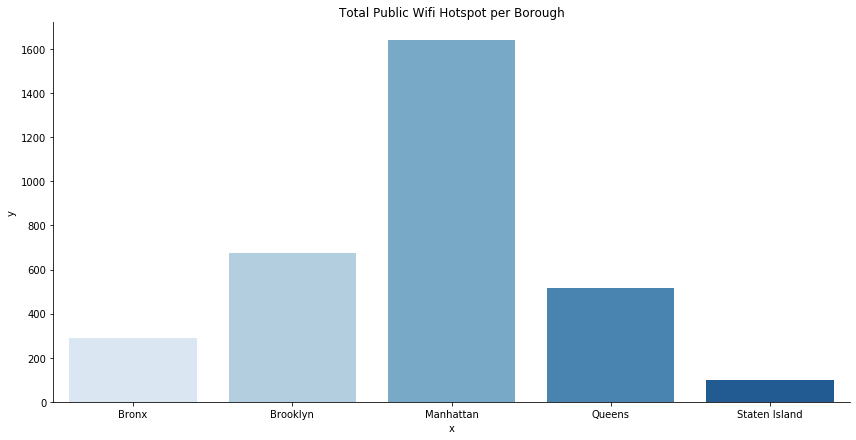

In [39]:
sns.factorplot("x","y", data=tryout,kind="bar",palette="Blues",size=6,aspect=2,legend_out=True)
plt.title("Total Public Wifi Hotspot per Borough")
plt.show()

2.Between the five boroughs in NYC, where is the pocket of poverties in NYC mostly concentrated?

In [40]:
##start working with the povertyperborough dictionary
#povertybyborough.keys()
povertybyborough

{"['Bronx']": ['0.3701',
  '0.5302',
  '0.5402',
  '0.5005',
  '0.5207',
  '0.1801',
  '0.3603',
  '0.4305',
  '0.3002',
  '0.5303',
  '0.4606',
  '0.4904',
  '0.3407',
  '0.2707',
  '0.44020000000000004',
  '0.47009999999999996',
  '0.44',
  '0.2808',
  '0.5007',
  '0.3107',
  '0.37079999999999996',
  '0.41090000000000004',
  '0.39030000000000004',
  '0.32049999999999995',
  '0.3607',
  '0.2303',
  '0.2009',
  '0.33039999999999997',
  '0.39030000000000004',
  '0.3505',
  '0.2602',
  '0.4805',
  '0.2802',
  '0.1105',
  '0.43079999999999996',
  '0.3607',
  '0.4103',
  '0.3404',
  '0.3507',
  '0.3801',
  '0.2704',
  '0.3508',
  '0.3801',
  '0.2901',
  '0.4907',
  '0.2807',
  '0.4104',
  '0.3601',
  '0.30010000000000003',
  '0.3408',
  '0.2701',
  '0.17059999999999997',
  '0.4208',
  '0.36060000000000003',
  '0.4108',
  '0.35009999999999997',
  '0.4307',
  '0.55',
  '0.28059999999999996',
  '0.45020000000000004',
  '0.38060000000000005',
  '0.45030000000000003',
  '0.5405',
  '0.3406',
  

In [41]:
#it's hard to make a dataframe because each borough has a different length of data. so we should compute the\
#sum of poor people percentage separately
#list(povertybyborough.keys())
print(len(povertybyborough["['Bronx']"]))
print(len(povertybyborough["['Brooklyn']"]))
print(len(povertybyborough["['Manhattan']"]))
print(len(povertybyborough["['Queens']"]))
print(len(povertybyborough["['Staten Island']"]))

106
209
228
184
29


In [43]:
#calculate the total poverty for Bronx borough
pov_Bronx = povertybyborough["['Bronx']"]
pov_Bronx = [float(i) for i in pov_Bronx]
totalpov_Bronx = sum(pov_Bronx)
#print(totalpov_Bronx)

#calculate the total poverty for Brooklyn borough
pov_Brooklyn = povertybyborough["['Brooklyn']"]
pov_Brooklyn = [float(i) for i in pov_Brooklyn]
totalpov_Brooklyn = sum(pov_Brooklyn)
#print(totalpov_Brooklyn)

#calculate the total poverty for Manhattan borough
pov_Manhattan = povertybyborough["['Manhattan']"]
pov_Manhattan = [float(i) for i in pov_Manhattan]
totalpov_Manhattan = sum(pov_Manhattan)
#print(totalpov_Manhattan)

#calculate the total poverty for Queens borough
pov_Queens = povertybyborough["['Queens']"]
pov_Queens = [float(i) for i in pov_Queens]
totalpov_Queens = sum(pov_Queens)
#print(totalpov_Queens)

#calculate the total poverty for Staten Island borough
pov_statislnd = povertybyborough["['Staten Island']"]
pov_statislnd = [float(i) for i in pov_statislnd]
totalpov_statislnd = sum(pov_statislnd)
#print(totalpov_statislnd)

In [44]:
print(totalpov_Bronx)
print(totalpov_Brooklyn)
print(totalpov_Manhattan)
print(totalpov_Queens)
print(totalpov_statislnd)

35.13679999999998
42.76639999999999
37.513500000000015
27.687699999999985
3.972999999999999


In [45]:
#let's make a new dataframe to visualize 
dataset2 = pd.DataFrame({'Bronx' : totalpov_Bronx, 
              'Brooklyn': totalpov_Brooklyn,
              'Manhattan': totalpov_Manhattan,
              'Queens': totalpov_Queens,
              'Staten Island':totalpov_statislnd}, index =['low income people'])

dataset2

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
low income people,35.1368,42.7664,37.5135,27.6877,3.973


In [47]:
x=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
y=[totalpov_Bronx,totalpov_Brooklyn,totalpov_Manhattan,totalpov_Queens,totalpov_statislnd
  ]
tryout2 = pd.DataFrame(dict(x=x, y=y))
tryout2

,x,y
0,Bronx,35.1368
1,Brooklyn,42.7664
2,Manhattan,37.5135
3,Queens,27.6877
4,Staten Island,3.9730


Text(0.5, 1, 'Percentage of Low Income Family per Borough')

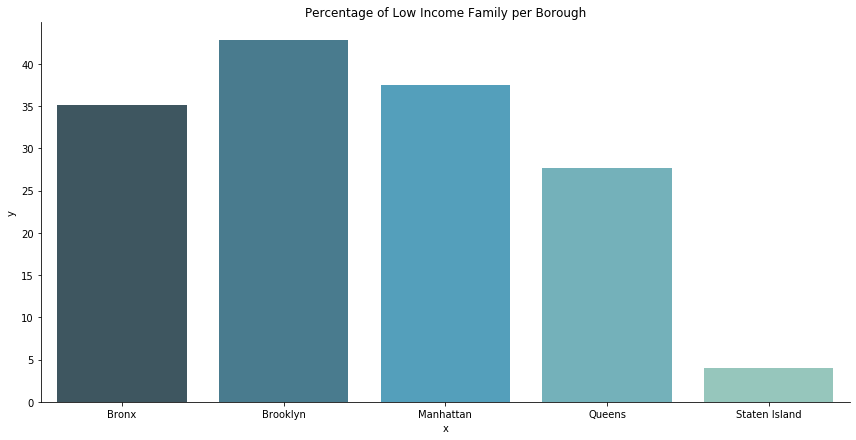

In [48]:
sns.factorplot("x","y", data=tryout2,kind="bar",palette="GnBu_d",size=6,aspect=2,legend_out=True)
plt.title("Percentage of Low Income Family per Borough")

3. Is there any statistical or spatial correlation between poverty/income-level and public wifi location?

In [49]:
#check again the finaldataset

In [50]:
df_finaldataset

,index,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Poverty,BOROCT2010,location,Provider,ct2010,borough,total_wifi
0,36005001900,2591.0,1206.0,1385.0,0.5504,0.0900,0.2900,0.0000,0.0201,0.3701,2001900.0,[141 LINCOLN AVENUE],[LinkNYC - Citybridge],19,Bronx,1
1,36005002000,8516.0,3301.0,5215.0,0.6101,0.0106,0.3101,0.0003,0.0303,0.5302,2002000.0,[660 SOUNDVIEW AVENUE],[NYPL],20,Bronx,1
2,36005002300,4774.0,2130.0,2644.0,0.6203,0.0002,0.3605,0.0100,0.0000,0.5402,2002300.0,[3 Avenue - 138 St [6]],[Transit Wireless],23,Bronx,1
3,36005002500,5355.0,2338.0,3017.0,0.7605,0.0105,0.1809,0.0000,0.0300,0.5005,2002500.0,[216 WILLIS AVENUE],[LinkNYC - Citybridge],25,Bronx,4
4,36005002702,4778.0,2427.0,2351.0,0.7103,0.0106,0.2602,0.0000,0.0000,0.5207,2002702.0,[710 EAST 138 STREET],[LinkNYC - Citybridge],2702,Bronx,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,36085019800,6690.0,3538.0,3152.0,0.0509,0.8802,0.0105,0.0005,0.0307,0.0503,5019800.0,[South parking lot Entrance],[SPECTRUM],198,Staten Island,5
752,36085020700,6178.0,3046.0,3132.0,0.5302,0.0806,0.3507,0.0000,0.0105,0.3304,5020700.0,[75 BENNETT STREET],[NYPL],207,Staten Island,1
753,36085020804,5602.0,2648.0,2954.0,0.0305,0.8508,0.0000,0.0000,0.0806,0.0708,5020804.0,[830 HUGUENOT AVENUE],[NYPL],20804,Staten Island,1
754,36085024401,6408.0,2755.0,3653.0,0.0803,0.8705,0.0000,0.0000,0.0201,0.0404,5024401.0,[7430 AMBOY ROAD],[NYPL],24401,Staten Island,1


In [51]:
df_finaldataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 755
Data columns (total 16 columns):
index         756 non-null object
TotalPop      756 non-null float64
Men           756 non-null float64
Women         756 non-null float64
Hispanic      756 non-null float64
White         756 non-null float64
Black         756 non-null float64
Native        756 non-null float64
Asian         756 non-null float64
Poverty       756 non-null float64
BOROCT2010    756 non-null float64
location      756 non-null object
Provider      756 non-null object
ct2010        756 non-null object
borough       756 non-null object
total_wifi    756 non-null int64
dtypes: float64(10), int64(1), object(5)
memory usage: 100.4+ KB


In [52]:
#it will be easier to work with float data, let's change the type of total wifi to float type
df_finaldataset['total_wifi'] = df_finaldataset['total_wifi'].astype(float)
df_finaldataset['Provider'] = df_finaldataset['Provider'].astype(str)
df_finaldataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 755
Data columns (total 16 columns):
index         756 non-null object
TotalPop      756 non-null float64
Men           756 non-null float64
Women         756 non-null float64
Hispanic      756 non-null float64
White         756 non-null float64
Black         756 non-null float64
Native        756 non-null float64
Asian         756 non-null float64
Poverty       756 non-null float64
BOROCT2010    756 non-null float64
location      756 non-null object
Provider      756 non-null object
ct2010        756 non-null object
borough       756 non-null object
total_wifi    756 non-null float64
dtypes: float64(11), object(5)
memory usage: 100.4+ KB


In [57]:
#check null value, more importantly in poverty and total wifi column
print((df_finaldataset[['total_wifi','Poverty']]==0).sum())

#there is 4 census tract which has 0 value in the poverty columns, but I think it's still acceptable since it\
#probably means this tract doesn't have poor people at all? as long as it is not NaN, it still logical to include\
#this zero values of poverty

total_wifi    0
Poverty       4
dtype: int64


In [58]:
corr = df_finaldataset.corr()
corr

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Poverty,BOROCT2010,total_wifi
TotalPop,1.000000,0.983318,0.987599,0.142002,-0.042342,-0.057904,-0.064355,-0.025884,0.049249,-0.279621,0.143093
Men,0.983318,1.000000,0.942567,0.166087,-0.036613,-0.101291,-0.063570,-0.004245,0.042361,-0.268814,0.152482
Women,0.987599,0.942567,1.000000,0.117408,-0.046153,-0.018902,-0.063308,-0.043868,0.053873,-0.281454,0.131154
Hispanic,0.142002,0.166087,0.117408,1.000000,-0.631106,-0.063485,-0.020128,-0.203504,0.581805,0.000517,-0.165033
White,-0.042342,-0.036613,-0.046153,-0.631106,1.000000,-0.587673,-0.021804,-0.010425,-0.622086,-0.121538,0.224052
Black,-0.057904,-0.101291,-0.018902,-0.063485,-0.587673,1.000000,-0.017387,-0.392205,0.316523,0.009292,-0.101877
Native,-0.064355,-0.063570,-0.063308,-0.020128,-0.021804,-0.017387,1.000000,0.066511,0.012318,-0.062520,0.051546
Asian,-0.025884,-0.004245,-0.043868,-0.203504,-0.010425,-0.392205,0.066511,1.000000,-0.198350,0.217869,-0.014219
Poverty,0.049249,0.042361,0.053873,0.581805,-0.622086,0.316523,0.012318,-0.198350,1.000000,-0.098481,-0.074947
BOROCT2010,-0.279621,-0.268814,-0.281454,0.000517,-0.121538,0.009292,-0.062520,0.217869,-0.098481,1.000000,-0.345121


In [59]:
#let's drop the columns and data type which won't have any meaningful interpretation if we do correlation\
#for example ID BOROCT2010, borough name, location, and provider
corr_new = corr.drop(['Men','Women','BOROCT2010'],axis=1)
corr_new1 = corr_new.drop(['Men','Women','BOROCT2010'],axis=0)
corr_new1

,TotalPop,Hispanic,White,Black,Native,Asian,Poverty,total_wifi
TotalPop,1.000000,0.142002,-0.042342,-0.057904,-0.064355,-0.025884,0.049249,0.143093
Hispanic,0.142002,1.000000,-0.631106,-0.063485,-0.020128,-0.203504,0.581805,-0.165033
White,-0.042342,-0.631106,1.000000,-0.587673,-0.021804,-0.010425,-0.622086,0.224052
Black,-0.057904,-0.063485,-0.587673,1.000000,-0.017387,-0.392205,0.316523,-0.101877
Native,-0.064355,-0.020128,-0.021804,-0.017387,1.000000,0.066511,0.012318,0.051546
Asian,-0.025884,-0.203504,-0.010425,-0.392205,0.066511,1.000000,-0.198350,-0.014219
Poverty,0.049249,0.581805,-0.622086,0.316523,0.012318,-0.198350,1.000000,-0.074947
total_wifi,0.143093,-0.165033,0.224052,-0.101877,0.051546,-0.014219,-0.074947,1.000000


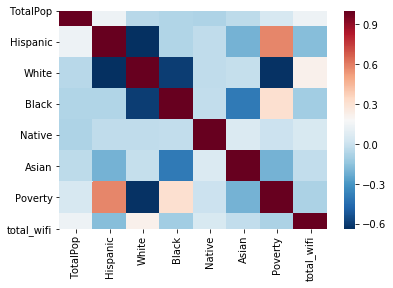

In [60]:
#visualize it using heatmap
sns.heatmap(corr_new1,cmap="RdBu_r")

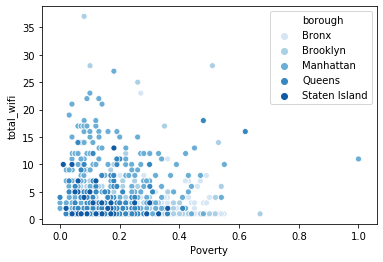

In [62]:
#visualize assumed correlation between poverty and total wifi using scatterplot
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Poverty", y="total_wifi",hue="borough",palette="Blues",data=df_finaldataset)

# Additional Spatial Mapping using ArcGIS


In [66]:
import webbrowser
url = 'https://arcg.is/199muG0?fbclid=IwAR3Bp5isY3ZT5WTlbjeh6VzHyaNqKwUirX1WmEcAWJFYImmSn9H3IKL_aaQ'
webbrowser.open(url)

True